In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set_palette("Dark2")
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5)

In [3]:
# versions

print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

pandas==1.5.3
numpy==1.24.2
seaborn==0.12.2
arviz==0.15.1
pymc==5.1.2
bambi==0.10.0


In [4]:
# import the data prepared in ERF_get_data

df = pd.read_csv('...')

# limit to only taxonomists, and create another df with the full dataset

df2 = df.copy()
df = df.loc[df['taxonomist?'] == 'taxonomist']

len(df)

456

We gave 3 abstracts, differing in suggesting there is/isn't geneflow, or not mentioning it at all (neutral). The figures below give the results for 'do you agree with the abstract' and 'would you accept it for a conference presentation?' in general and comparing various groups of respondents.

# Variables and categories used for the analysis

In [5]:
demo = ['taxonomist?', 'professional',
       'Country', 'specialization', 'broad_reader', 'experience', 'species_concepts', 'continent']
agree = ['c1_agree', 'c2_agree','c3_agree']
accept = ['c1_accept','c2_accept','c3_accept']
cases = ['condition_c1','condition_c2','condition_c3']
demo2 = ['taxonomist?','professional','specialization','broad_reader','experience','species_concepts']
lacking = ['c2_lack_morph', 'c2_lack_dna', 'c2_lack_hab','c2_lack_other']

# dictionary for titles
q_dct = {'condition_c1': 'Condition plant case','condition_c2':'Condition frog case','condition_c3':'Condition flatworm case',
        'c1_agree':'Agreement plant case','c2_agree':'Agreement frog case','c3_agree':'Agreement flatworm case'}


# Main dataset

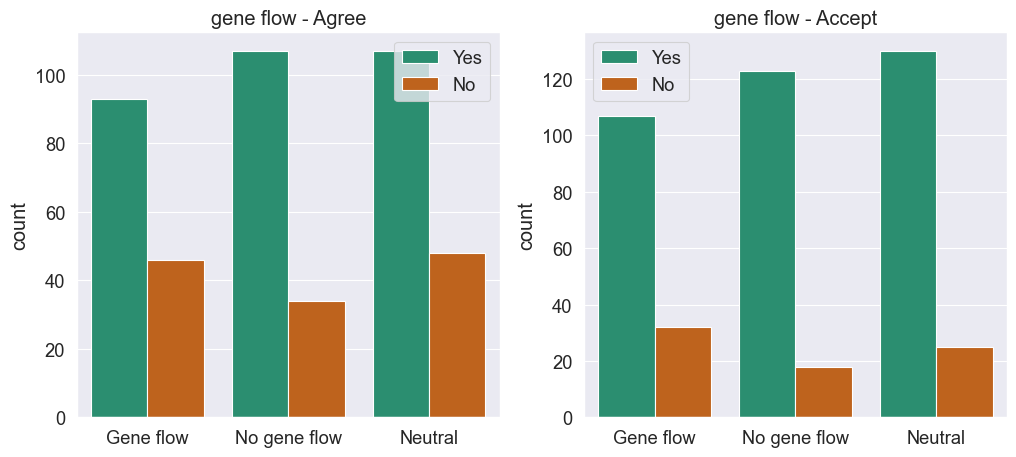

In [6]:
fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df.loc[df.condition_c3 != 'No response'], x = 'condition_c3', hue = 'c3_accept', ax =ax[1])
ax[1].set_title('gene flow - Accept')

sns.countplot(data = df.loc[df.condition_c3 != 'No response'], x = 'condition_c3', hue = 'c3_agree', ax =ax[0])
ax[0].set_title('gene flow - Agree')

ax[0].set_xlabel('')
ax[0].legend(['Yes','No'])
ax[1].set_xlabel('')
ax[1].legend(['Yes','No'])

plt.show()

# Agree & Accept

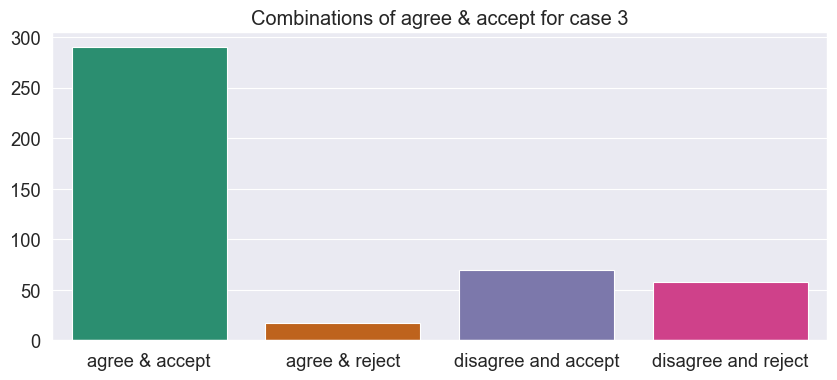

In [7]:
fig, ax = plt.subplots(figsize = (10,4))

df['c3AgAc'] = (df['c3_agree']) + (df['c3_accept'])

sns.countplot(data = df.loc[(df.c3_agree != 'No response') & (df.c3_accept != 'No response')],
             x = 'c3AgAc',
             ax=ax)
ax.set_xticklabels(['agree & accept','agree & reject','disagree and accept','disagree and reject'])
ax.set_title('Combinations of agree & accept for case 3')
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

# non-taxonomists

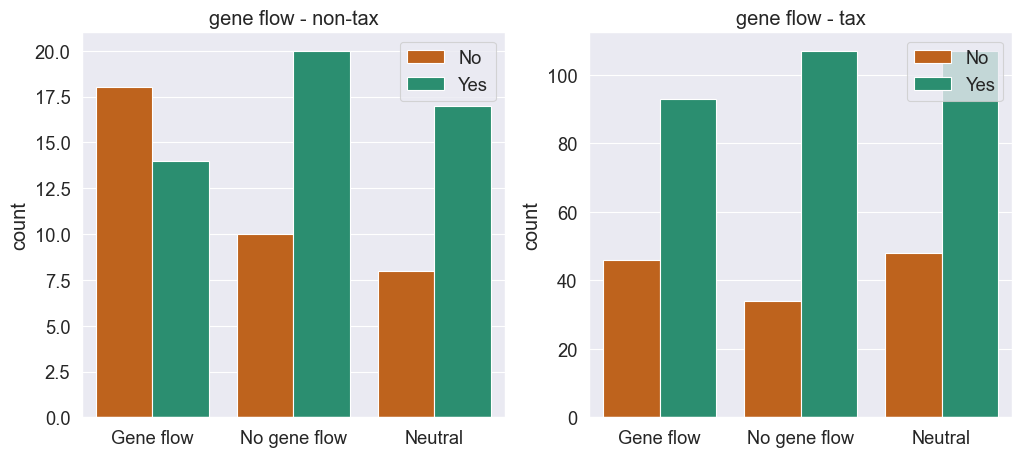

In [8]:
# agree and accept

fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df2.loc[(df2.condition_c3 != 'No response') & (df2['taxonomist?'] == 'taxonomist')], palette=["C1", "C0"],x = 'condition_c3', hue = 'c3_agree', hue_order = ['no','yes'], ax =ax[1])
ax[1].set_title('gene flow - tax')

sns.countplot(data = df2.loc[(df2.condition_c3 != 'No response') & (df2['taxonomist?'] == 'non_taxonomist')], x = 'condition_c3', hue = 'c3_agree', palette=["C1", "C0"],hue_order = ['no','yes'],ax =ax[0])
ax[0].set_title('gene flow - non-tax')

ax[0].set_xlabel('')
ax[0].legend(['No','Yes'])
ax[1].set_xlabel('')
ax[1].legend(['No','Yes'])

plt.show()



# Specialists

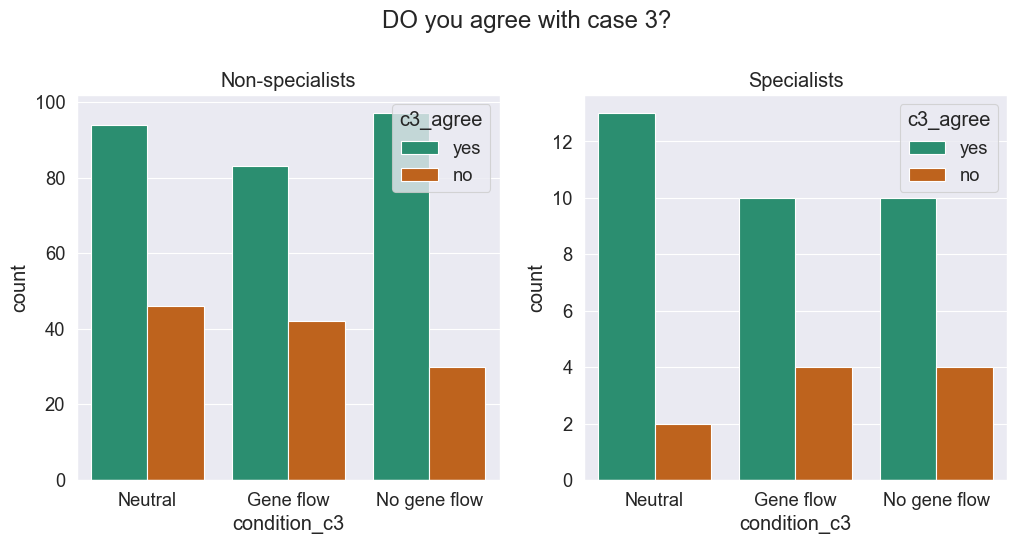

In [9]:
fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

order = ['Neutral','Gene flow','No gene flow']

sns.countplot(data = df.loc[(df.condition_c3 != 'No response') & (df['specialization'] == 'Remaining invertebrates')], order = order,x = 'condition_c3',palette=["C0","C1"], hue = 'c3_agree', ax =ax[1])
ax[1].set_title('Specialists')

sns.countplot(data = df.loc[(df.condition_c3 != 'No response') & (df['specialization'] != 'Remaining invertebrates')],order = order, x = 'condition_c3', hue = 'c3_agree', palette=["C0","C1"],ax =ax[0])
ax[0].set_title('Non-specialists')

plt.suptitle('DO you agree with case 3?', y=1.05)

plt.show()

# Low vs high income

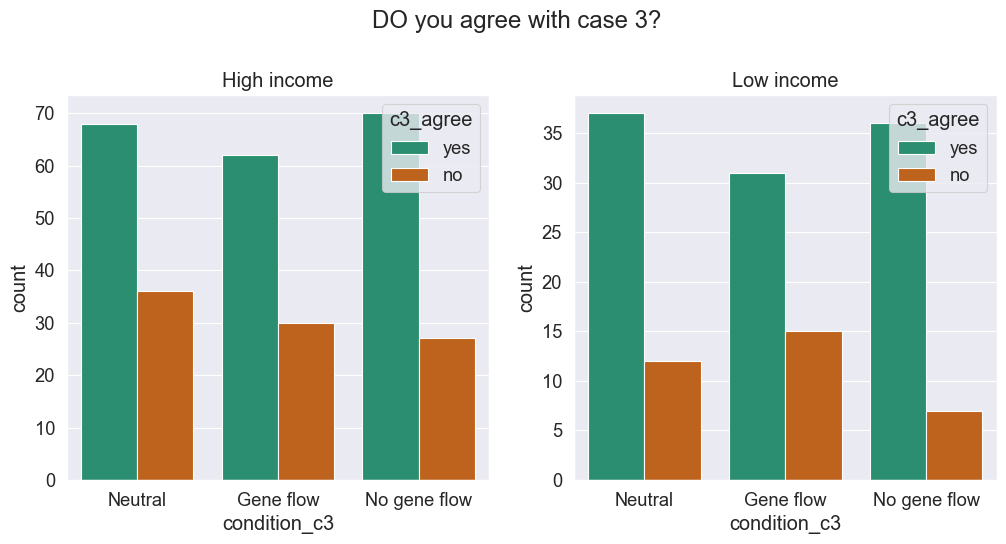

In [10]:
fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df.loc[(df.condition_c3 != 'No response') & (df['low_income'] == '1')], order = ['Neutral','Gene flow','No gene flow'],x = 'condition_c3',palette=[ "C0","C1"], hue = 'c3_agree', ax =ax[1])
ax[1].set_title('Low income')

sns.countplot(data = df.loc[(df.condition_c3 != 'No response') & (df['low_income'] == '0')],order = ['Neutral','Gene flow','No gene flow'], x = 'condition_c3', hue = 'c3_agree', palette=[ "C0","C1"],ax =ax[0])
ax[0].set_title('High income')

plt.suptitle('DO you agree with case 3?', y=1.05)


plt.show()

# Continents

## Continent groups

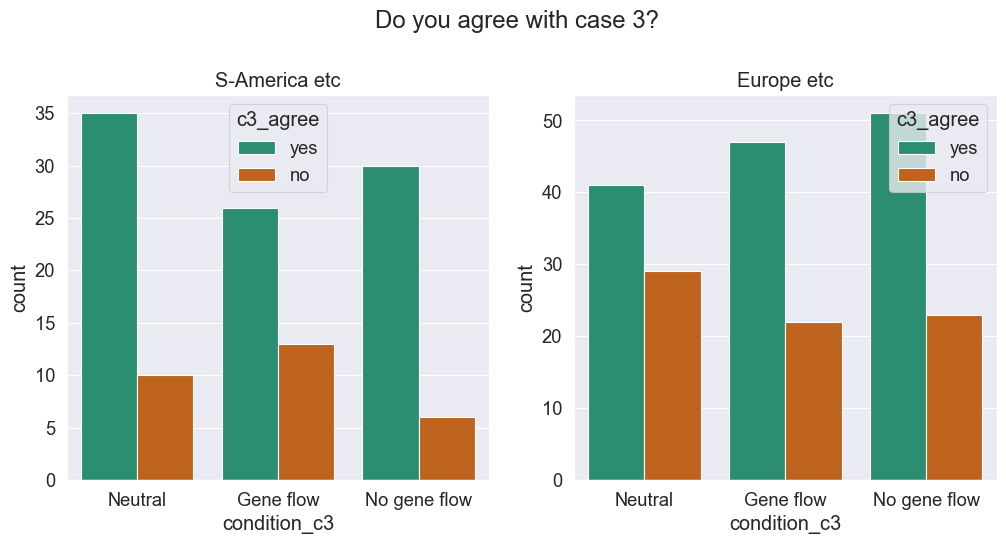

In [11]:
fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df.loc[(df.condition_c3 != 'No response') &
                            ((df['continent'] == 'Europe') | 
                             (df['continent'] == 'Oceania'))], 
              x = 'condition_c3',
              palette=["C0","C1"],
              hue = 'c3_agree',
              order = order,
              ax =ax[1])

ax[1].set_title('Europe etc')

sns.countplot(data = df.loc[(df.condition_c3 != 'No response') &
                            ((df['continent'] == 'Africa') |
                            (df['continent'] == 'South America') | 
                            (df['continent'] == 'Asia'))], 
              x = 'condition_c3',
              order = order,
              palette=["C0","C1"],
              hue = 'c3_agree',
              ax =ax[0])

ax[0].set_title('S-America etc')

plt.suptitle('Do you agree with case 3?', y=1.05)

plt.show()

## continents

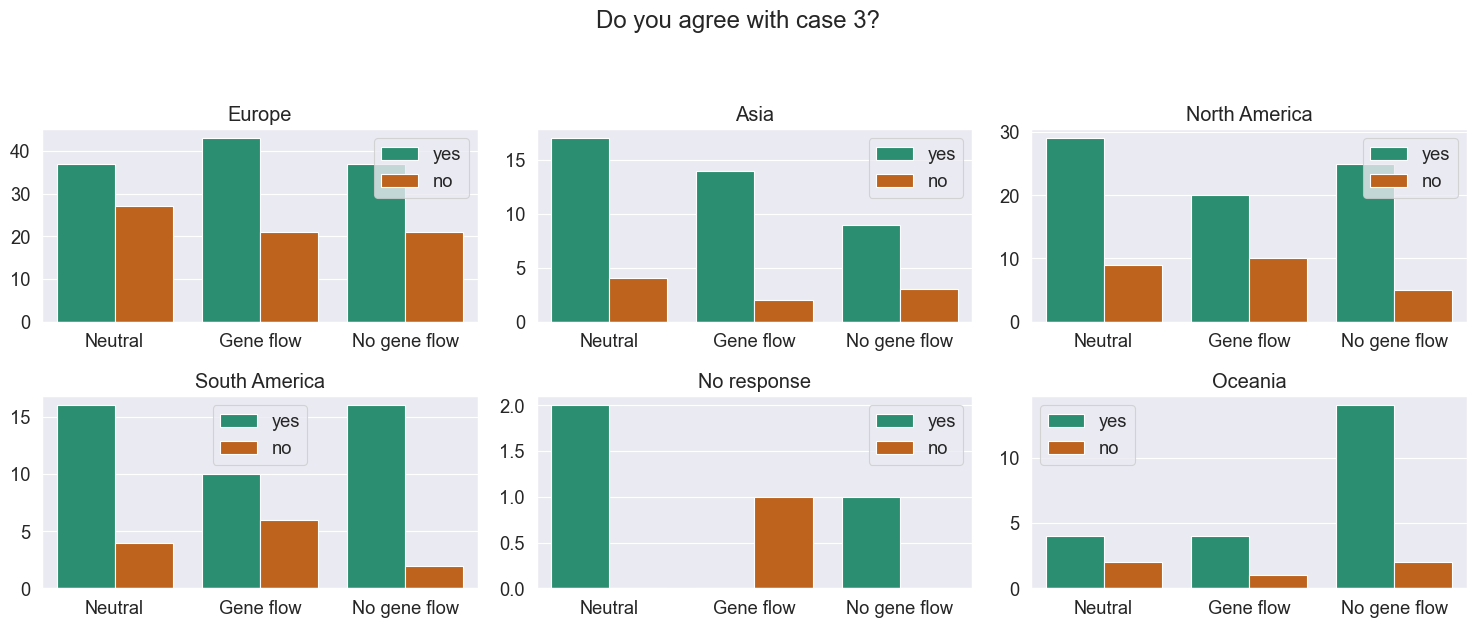

In [12]:
fig, axs = plt.subplots(2,3, figsize = (15,6))

for ax, col in zip(axs.flat, df.continent.unique()):

    sns.countplot(data = df.loc[(df.condition_c3 != 'No response') & (df['continent'] == col)],order = order, x = 'condition_c3',palette=["C0", "C1"], hue = 'c3_agree',hue_order = ['yes','no'], ax =ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(['yes','no'])

plt.suptitle('Do you agree with case 3?', y=1.05)

    
fig.tight_layout()

# Species concept

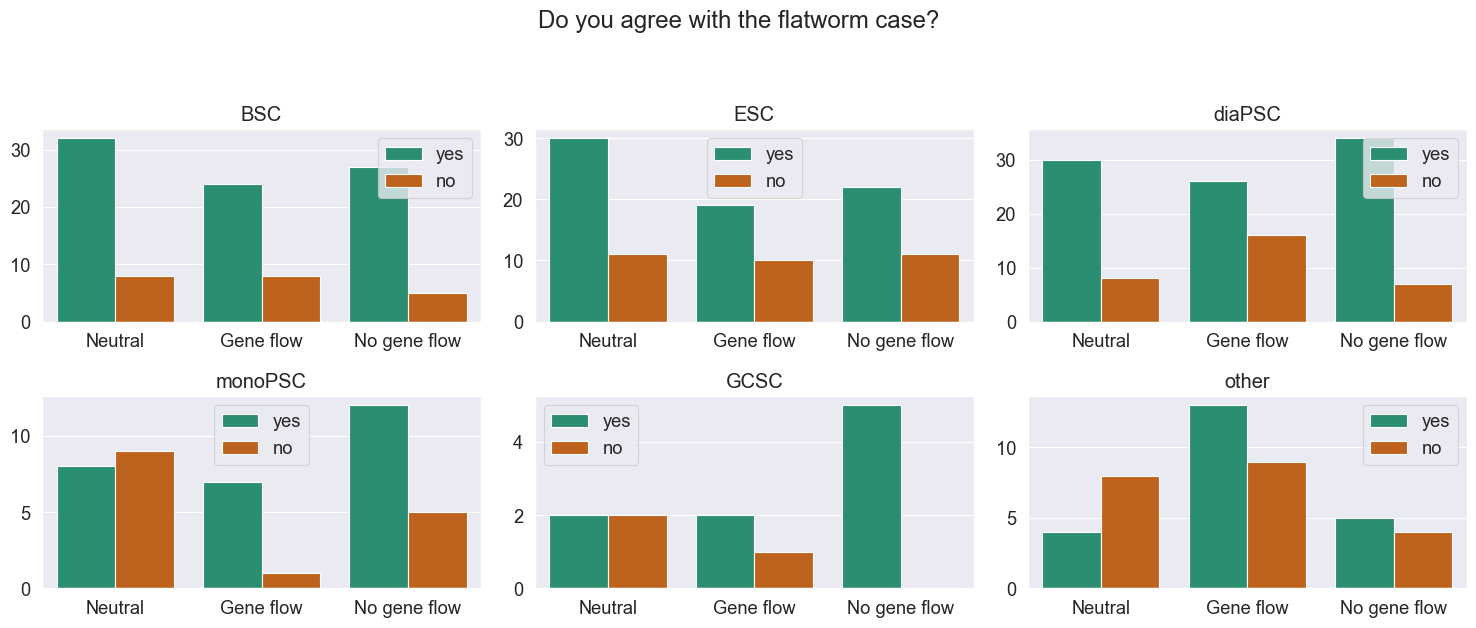

In [13]:
fig, axs = plt.subplots(2,3, figsize = (15,6))

for ax, col in zip(axs.flat, ['BSC', 'ESC', 'diaPSC', 'monoPSC', 'GCSC','other']):

    sns.countplot(data = df.loc[(df.condition_c3 != 'No response') & (df['species_concepts'] == col)],order = order,hue_order = ['yes','no'], x = 'condition_c3',palette=[ "C0","C1"], hue = 'c3_agree', ax =ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(['yes','no'])

plt.suptitle('Do you agree with the flatworm case?', y=1.05)


fig.tight_layout()

# Experience

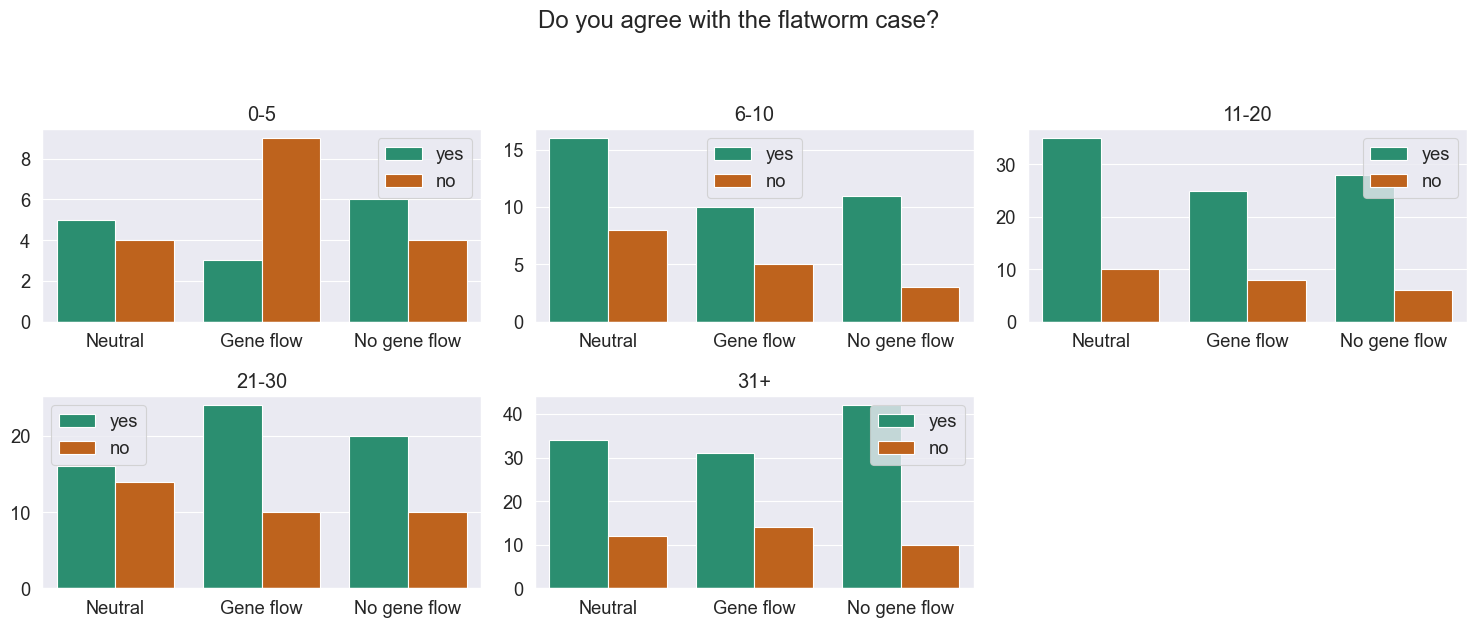

In [14]:
fig, axs = plt.subplots(2,3, figsize = (15,6))

for ax, col in zip(axs.flat, ['0-5','6-10', '11-20', '21-30', '31+']):

    sns.countplot(data = df.loc[(df.condition_c3 != 'No response') & (df['experience'] == col)],order = order,hue_order = ['yes','no'], x = 'condition_c3',palette=[ "C0","C1"], hue = 'c3_agree', ax =ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(['yes','no'])

axs[1,2].set_visible(False)
    
plt.suptitle('Do you agree with the flatworm case?', y=1.05)


fig.tight_layout()